In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv('breast_cancer.csv')

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [5]:
data_fc=data.drop(['id','diagnosis'],axis=1)

In [8]:
data_fc.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [9]:
from scipy.stats import zscore
data_fc=data_fc.apply(zscore)

In [10]:
cluster_range=range(1,15)
cluster_error=[]#intertia
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)#cluster__>model
    clusters.fit(data_fc)
    labels=clusters.labels_
    centroid=clusters.cluster_centers_
    cluster_error.append(clusters.inertia_)
cluster_df=pd.DataFrame({"num_clusters":cluster_range,'cluster error':cluster_error})

In [11]:
cluster_df

,num_clusters,cluster error
0,1,17070.000000
1,2,11595.526607
2,3,10061.797818
3,4,9257.354603
4,5,8562.288240
5,6,7972.238677
6,7,7542.604431
7,8,7144.823825
8,9,6878.912939
9,10,6598.049618


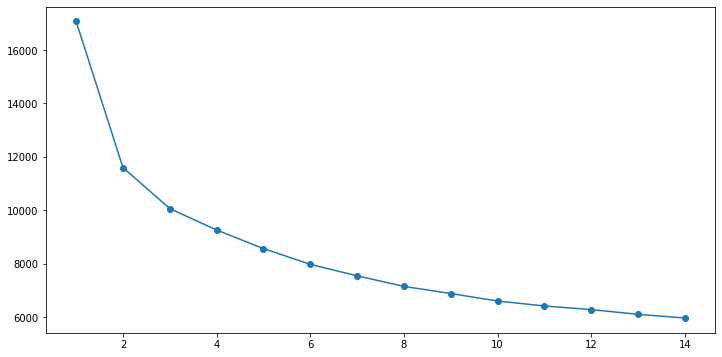

In [12]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters,cluster_df['cluster error'],marker="o")
plt.show()

k =3

In [13]:
kmeans=KMeans(n_clusters=3,n_init=15,random_state=2)
kmeans.fit(data_fc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [14]:
centroidk=kmeans.cluster_centers_

In [16]:
centroid_df=pd.DataFrame(centroidk,columns=list(data_fc))

In [23]:
centroid_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.172329,0.178987,-0.100744,-0.220014,0.849226,1.035431,0.781006,0.499427,0.752793,1.183982,...,-0.088230,0.311468,-0.007015,-0.156477,0.969150,1.179772,1.045055,0.742998,0.809916,1.384613
1,-0.448095,-0.241855,-0.469542,-0.448316,-0.358676,-0.573567,-0.597292,-0.594734,-0.342112,-0.241886,...,-0.486127,-0.253108,-0.505713,-0.472692,-0.373183,-0.534009,-0.562765,-0.597075,-0.317632,-0.411444
2,1.619082,0.626613,1.624001,1.663154,0.398565,0.930614,1.239337,1.486970,0.432170,-0.286919,...,1.666749,0.542900,1.656842,1.684947,0.336889,0.670291,0.886611,1.273182,0.300346,0.084066


In [17]:
labels=kmeans.labels_

In [18]:
data_fc['labels']=labels

In [19]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of K Means Clustering')

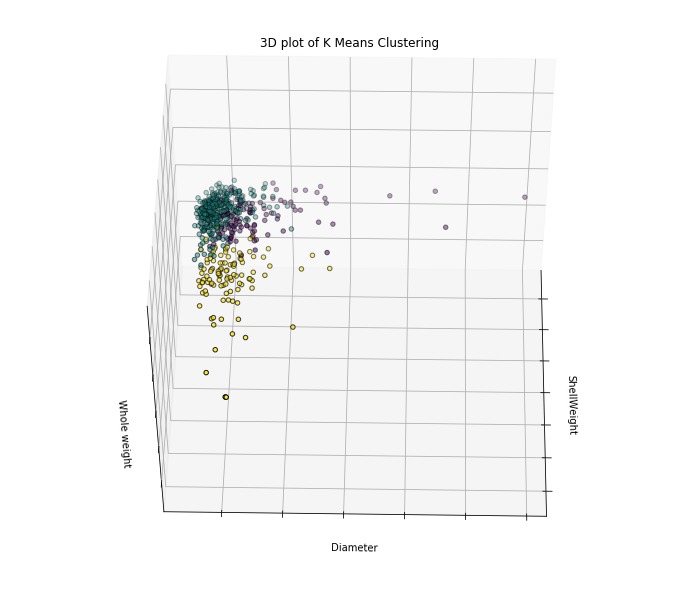

In [28]:
fig=plt.figure(figsize=(10,8))
ax=Axes3D(fig,rect=[0,0,.95,1],elev=50,azim=1)
#kmeans.fit(df_scaled)
#labels=kmeans.labels_
ax.scatter(data_fc.iloc[:,3],data_fc.iloc[:,19],data_fc.iloc[:,15],c=labels.astype(np.float),edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('ShellWeight')
ax.set_ylabel('Diameter')
ax.set_zlabel('Whole weight')
ax.set_title('3D plot of K Means Clustering')